In [3]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [4]:
# Mengatur pandas untuk menampilkan seluruh data
pd.set_option('display.max_rows', None)


In [5]:
# Load dataset
file_path = "index kriminalitas.csv"  # Sesuaikan nama file jika berbeda
data = pd.read_csv(file_path)

In [6]:
# Menampilkan dataset secara keseluruhan
print(data)

                    Country  Crime Index  Safety Index
0                 Venezuela        84.36         15.64
1          Papua New Guinea        80.04         19.96
2              South Africa        77.29         22.71
3               Afghanistan        76.97         23.03
4                  Honduras        76.65         23.35
5       Trinidad And Tobago        72.43         27.57
6                    Brazil        68.31         31.69
7                    Guyana        68.15         31.85
8               El Salvador        67.84         32.16
9                     Syria        67.42         32.58
10                  Jamaica        67.20         32.80
11                  Namibia        66.12         33.88
12                   Angola        65.74         34.26
13                     Peru        65.65         34.35
14              Puerto Rico        64.75         35.25
15               Bangladesh        63.82         36.18
16                  Nigeria        63.27         36.73
17        

In [7]:
# 1. Menghitung Crime to Safety Ratio
data['Crime to Safety Ratio'] = data['Crime Index'] / data['Safety Index']

# 2. Menghitung Crime Severity Score
data['Crime Severity Score'] = data['Crime Index'] * (1 - data['Safety Index'] / 100)

# 3. Menentukan Priority Level
def calculate_priority(score):
    if score > 70:
        return "High Priority"
    elif score > 40:
        return "Medium Priority"
    else:
        return "Low Priority"

data['Priority Level'] = data['Crime Severity Score'].apply(calculate_priority)

# 4. Menghitung Safety Improvement Need
data['Safety Improvement Need'] = np.maximum(80 - data['Safety Index'], 0)

# 5. Menghitung Potential Regulation Impact Score
data['Potential Regulation Impact Score'] = data['Crime Index'] * 0.8

# 6. Menghitung Country Stability Index
data['Country Stability Index'] = data['Crime Index'] + (100 - data['Safety Index']) / 2


In [12]:
# Menampilkan dataset dengan kolom baru secara keseluruhan dalam format tabel
pd.set_option('display.max_colwidth', None)
print(data.to_string(index=False))

               Country  Crime Index  Safety Index  Crime to Safety Ratio  Crime Severity Score  Priority Level  Safety Improvement Need  Potential Regulation Impact Score  Country Stability Index
             Venezuela        84.36         15.64               5.393862             71.166096   High Priority                    64.36                             67.488                  126.540
      Papua New Guinea        80.04         19.96               4.010020             64.064016 Medium Priority                    60.04                             64.032                  120.060
          South Africa        77.29         22.71               3.403347             59.737441 Medium Priority                    57.29                             61.832                  115.935
           Afghanistan        76.97         23.03               3.342162             59.243809 Medium Priority                    56.97                             61.576                  115.455
              Hondur

In [9]:
    # Normalisasi data untuk clustering
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    normalized_data = scaler.fit_transform(data[['Crime Index', 'Safety Index',
                                                 'Crime to Safety Ratio', 'Crime Severity Score',
                                                 'Safety Improvement Need',
                                                 'Potential Regulation Impact Score',
                                                 'Country Stability Index']])

In [13]:
# Menentukan jumlah cluster menggunakan metode "elbow"
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_data)
    inertia.append(kmeans.inertia_)


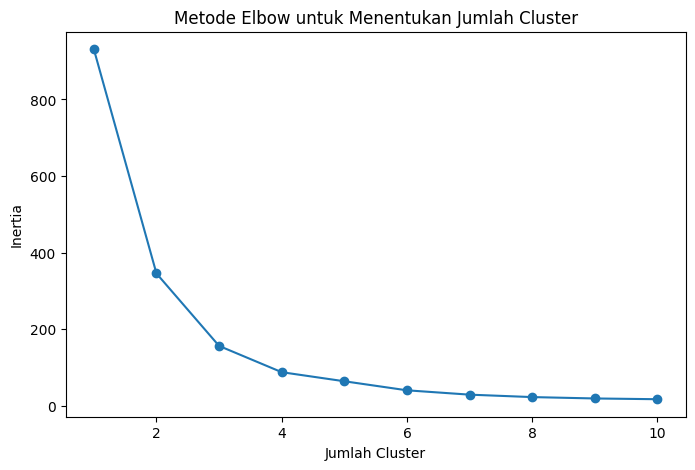

In [29]:
# Plot metode elbow
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster')
plt.show()

In [30]:
# Menggunakan KMeans dengan jumlah cluster optimal (2 cluster)
kmeans = KMeans(n_clusters=2, random_state=42)
data['Cluster'] = kmeans.fit_predict(normalized_data)

In [31]:
# Memberi label pada cluster
def label_cluster(cluster, crime_index, stability_index):
    if cluster == 0:
        return "Membutuhkan Regulasi" if crime_index > 50 or stability_index < 50 else "Tidak Membutuhkan Regulasi"
    else:
        return "Membutuhkan Regulasi" if crime_index > 50 or stability_index < 50 else "Tidak Membutuhkan Regulasi"

In [32]:
# Tambahkan kolom Regulation Need berdasarkan hasil clustering
data['Regulation Need'] = data.apply(lambda row: label_cluster(row['Cluster'], row['Crime Index'], row['Country Stability Index']), axis=1)

In [33]:
    # Menampilkan hasil klasifikasi
    print(data[['Country', 'Crime Index', 'Safety Index', 'Country Stability Index', 'Regulation Need']].to_string(index=False))

               Country  Crime Index  Safety Index  Country Stability Index            Regulation Need
             Venezuela        84.36         15.64                  126.540       Membutuhkan Regulasi
      Papua New Guinea        80.04         19.96                  120.060       Membutuhkan Regulasi
          South Africa        77.29         22.71                  115.935       Membutuhkan Regulasi
           Afghanistan        76.97         23.03                  115.455       Membutuhkan Regulasi
              Honduras        76.65         23.35                  114.975       Membutuhkan Regulasi
   Trinidad And Tobago        72.43         27.57                  108.645       Membutuhkan Regulasi
                Brazil        68.31         31.69                  102.465       Membutuhkan Regulasi
                Guyana        68.15         31.85                  102.225       Membutuhkan Regulasi
           El Salvador        67.84         32.16                  101.760       M

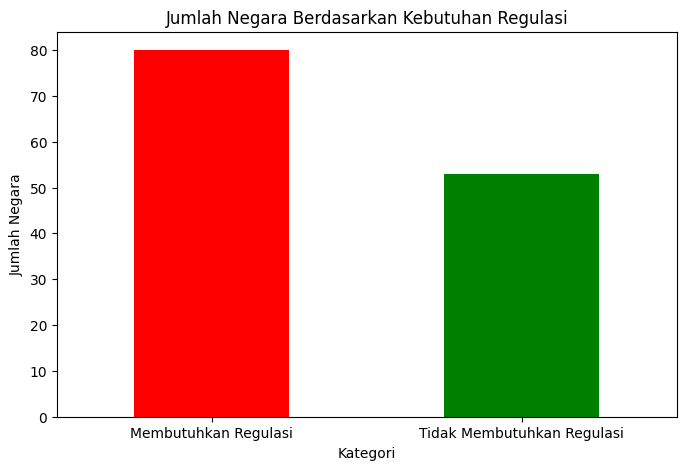

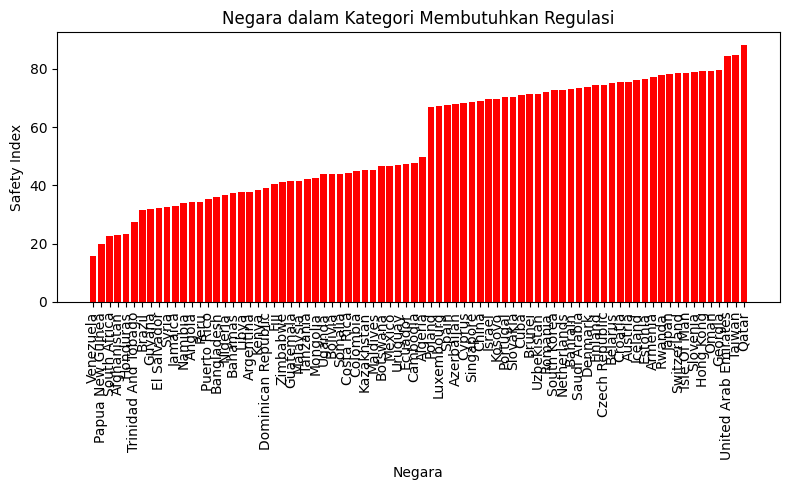

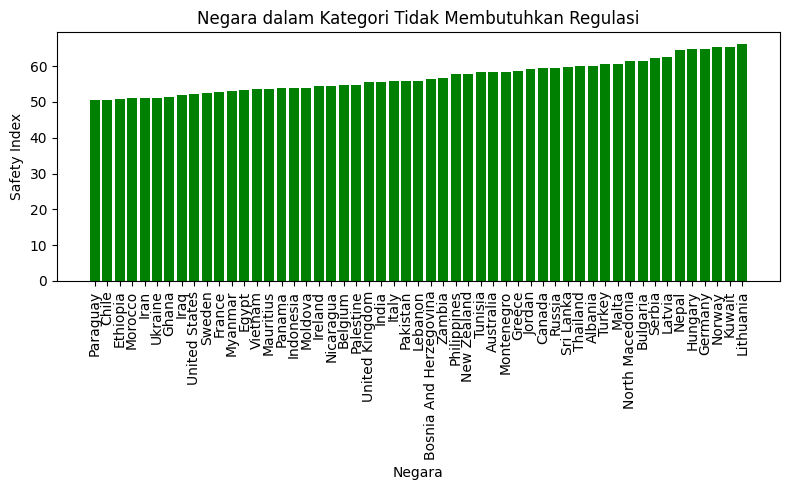

In [34]:
# Visualisasi jumlah negara dalam setiap kategori regulasi
regulation_counts = data['Regulation Need'].value_counts()

plt.figure(figsize=(8, 5))
regulation_counts.plot(kind='bar', color=['red', 'green'])
plt.title('Jumlah Negara Berdasarkan Kebutuhan Regulasi')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Negara')
plt.xticks(rotation=0)
plt.show()

# Visualisasi per kategori negara berdasarkan kebutuhan regulasi
categories = ['Membutuhkan Regulasi', 'Tidak Membutuhkan Regulasi']
colors = ['red', 'green']

for category, color in zip(categories, colors):
    subset = data[data['Regulation Need'] == category]
    plt.figure(figsize=(8, 5))
    plt.bar(subset['Country'], subset['Safety Index'], color=color)
    plt.title(f'Negara dalam Kategori {category}')
    plt.xlabel('Negara')
    plt.ylabel('Safety Index')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()